[Open In Colab](https://colab.research.google.com/github/joelbenjohn/Construction_Scheduling/blob/master/ORProject_Scheduling.ipynb)

## Literature Review

Scheduling or planning  is the backbone of project management and is key to successful execution of project. Due to the number of parameters of a large project be it a construction project, manufacturing project or a computer engineering project, the problem to be solved could be NP hard and use of efficient algorithms to achieve optimality is of importance. Scheduling has become one of operations research important challenges thus and many leads have been made in that respect.
Construction schedule optimization (CSO) problem is a subset of project scheduling optimization problem and most of the techniques and algorithms used maybe applicable to the CSO problem. CSO requires optimally sequencing activities over time to achieve a said objective with resource constraints.

### Objective Function

CSO started off with minimizing project durations to minimize direct costs(labor, plant and equipment, materials costs). Minimizing time required to complete the project became the criteria for contractors to win bid evaluations. This problem is a single objective optimization problem and techniques such as the Critical Path Method (CPM). The CPM is a widely used project scheduling algorithm that was developed in the late 1950s (Kelley and Walker, 1959; Kelley, 1961).

The contractor could ‘crash’ a particular activities duration by speeding up the process with additional resources. This would reduce the overall time required and give advantage in bid evaluation but would also lead to increase in cost of ‘crashed’ activity. Therefore total cost also should be kept in mind for the client and bi objective problem could be solved to minimize time and total costs. 

However, minimization of time and cost will have an influence on the project quality and risk, which are even more crucial for the successful completion of a construction project. Unfortunately, these key factors have been neglected in most of studies undertaken to date. It is suggested therefore that a multi-objective construction scheduling problem considering both minimization of time–cost–risk and maximization of the quality subject to multiple constraints would be a promising future research topic.

### Constraints

The most basic restraint in sequencing activities that add to completion of a project is the dependence of one activity start time to the completion of others(Guo et al, 2010). For example, laying scaffolding for columns cannot be done before curing period of concrete floors is complete or activities of second floor cannot be started until activities of first floor is complete. Activity four starts only after activity 1 and 3 are complete.

Each activity may have a certain cost allotted to it and acquiring required resources within cost constraint is important. Each activity may also have resource constraints in terms of skilled labor, equipment, or material availability at that time (like a job shop scheduling problem). 

A Table classifying CSO problem methods can be found at 
<a href="https://link.springer.com/article/10.1057/jors.2012.174/tables/1" target="_blank">this link</a>

### Critical Path Method (CPM) Example

While solving only for time minimization objective, CPM is the most commonly used scheduling tool in the construction industry. With information such as:

* A list of all activities within the project
* The duration of each activity
* The precedence relationship between the activities

CPM can be used to calculate the longest path (critical path) to complete the project, and the earliest and latest starting and finishing time of each activity without delaying the completion of the project. Activities on the critical path are termed as ‘critical activities’ and those not on the critical path are ‘float activities.

The critical path method is a two step process consisting of forward pass and a backward pass. In the forward pass, the earliest start(ES) and earliest finish(EF) time of an activity is determined. The earliest finish time of the last activity is set as its latest finish time. A backward pass is then conducted to determine latest finish(LF) time and latest start(LS) time of each activity upto the first activity. The float of each activity is its LF-EF. The activities with zero float are in the critical path. The positive float value activities are called float activities as delaying its completion within its float period does not affect project finish time.
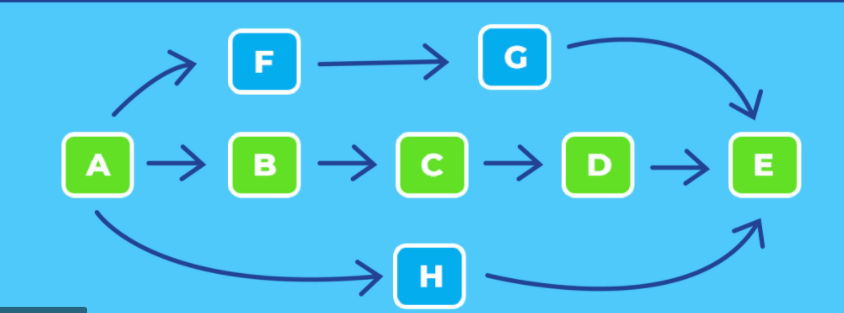

Activities A, B, C, D, E are critical activities. Any delay to these activities will delay the project completion.
Activities F, G and H are float activities. Delays to these within its float do not affect the project completion time.

#### Install Critical Path package

In [ ]:
!pip install criticalpath

#### Specify actiivty list,  duration and precedence relation

In [ ]:
from criticalpath import Node
### Name Project
p = Node('project')

### Specify Activity list with correspoding duration and allowed lag
a = p.add(Node('A', duration=3))
b = p.add(Node('B', duration=3, lag=0))
c = p.add(Node('C', duration=4, lag=0))
d = p.add(Node('D', duration=6, lag=0))
e = p.add(Node('E', duration=5, lag=0))

### Specify precedence relations
p.link(a, b).link(a, c).link(a, d).link(b, e).link(c, e).link(d, e)

p.update_all()

In [ ]:
p.get_critical_path()

In [ ]:
p.duration

In this example we solved a static problem with given duration and activity precedence. Getting the shortest path route and duration is really easy as shown. 

In reality activity duration is only estimated and depends on resource availability and can be disrupted by weather conditions, accidents, etc.

Limited-resource allocation algorithms aim to find the CPM schedule duration that is shortest as well as consistent with specified resource limits and essentially deal with the notorious ‘combinatorial explosion’ problem in mathematics (Hegazy 1999)

Liu and Li (2003) developed a method to accommodate resource constraints and repetitive scheduling known as the Resource-Activity Critical-Path Method (Heuristic Method). On the basis of the resource-technology combined precedence relationships, the start/finish times and the floats are defined as resource-activity attributes. However, minimization of the overall project cost was not considered in this approach

### The LP formulation
A time–cost trade-off construction scheduling problem presented by LP model can be expressed as follows (Liu et al, 1995)

Minimize $\sum_{i=1}^n C_{i}$

Subject to

$S_{i} \geq 0$, $i=1, 2, .., n$

$S_{i} + D_{i} \leq D_{max}$, $i=1, 2, .., n$

$S_{a} + D_{a} \leq S_{b}$ for each precedence a → b

$C_{i} \geq M_{ij}D_{i} + B_{ij}$,  $i=1, 2, .., n$, $j=1, 2, .., O_{i}$

$C_{i} \geq C_{i}^{min}$,  $i=1, 2, .., n$

$D_{i} \geq D_{i}^{min}$,  $i=1, 2, .., n$

Where 
$C_{i}$ is the cost of activity $i$.

$S_{i}, D_{i}$ and $O_{i}$ are the start time, duration and number of inequality constraints of acitivity $i$ repectively.

$D_{max}$ is the maximum allowable overall project duration. $C_{i}^{min}$ and $D_{i}^{min}$ are the minimum cost and duration of activity $i$, respectively.

$M_{ij}$ represents the slop of inequality constraint connecting the adjacent active options pair.

$n$ denotes the total number of all activities. 

$B_{ij}$ is the intercept of cost for option $j$ with respect to activity $i$

The objective is to minimize overall project cost. Methods like simplex can be used to solve this LP efficiently.

Various conventional approaches have been formulated to solve the problem optimally, including integer programming *IP*, branch-and-bound, and dynamic programming and the implicit enumeration approaches (Lee and Gatton 1994, Nudtasomboon
and Randhawa 1996, Sung and Lim 1996,  Demeulemeester and Herroelen 1997). But none of these is computationally tractable for any real-life problem size, thus rendering them impractical(Hegazy 1999)

### Scheduling using LP formulation

In [1]:
import OR_template
x = OR_template.MainPrePro()
page = x.run()
display(page)

Restricted license - for non-production use only - expires 2022-01-13
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 55 rows, 21 columns and 83 nonzeros
Model fingerprint: 0xd3eeae01
Variable types: 0 continuous, 21 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+00, 8e+04]
Found heuristic solution: objective -127419.0000
Presolve removed 44 rows and 10 columns
Presolve time: 0.00s
Presolved: 11 rows, 11 columns, 28 nonzeros
Variable types: 0 continuous, 11 integer (0 binary)

Root relaxation: objective -1.075000e+05, 4 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    -107500.0000 -107500.00  0.00%     -   